<a href="https://colab.research.google.com/github/Fishlalune/OpenTrivia/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Harringtonine CropArray Example

---

## Notebook summary 


- Load a microscope image of video
- Tracking spots on the image and generate a pandas dataframe with the spots locations
- Creating a croparray with the image and dataframe
- Signal quantification and plotting
- Visualization of croparray with Napari

----

In [ ]:
pip install trackpy

In [ ]:
pip install napari

     |████████████████████████████████| 2.5 MB 4.6 MB/s 
     |████████████████████████████████| 98 kB 5.9 MB/s 
     |████████████████████████████████| 10.9 MB 39.6 MB/s 
     |████████████████████████████████| 1.1 MB 36.9 MB/s 
     |████████████████████████████████| 51 kB 157 kB/s 
     |████████████████████████████████| 55 kB 2.5 MB/s 
     |████████████████████████████████| 3.3 MB 37.0 MB/s 
     |████████████████████████████████| 596 kB 22.1 MB/s 
     |████████████████████████████████| 209 kB 45.0 MB/s 
     |████████████████████████████████| 48 kB 2.6 MB/s 
     |████████████████████████████████| 1.5 MB 23.0 MB/s 
     |████████████████████████████████| 136 kB 38.0 MB/s 
     |████████████████████████████████| 4.3 MB 24.6 MB/s 
     |████████████████████████████████| 2.3 MB 30.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 130 kB 55.0 MB/s 
     |██████

In [ ]:
# To manipulate arrays
import numpy as np 
from skimage.io import imread
import matplotlib.pyplot as plt 
from matplotlib.path import Path
import pylab as pyl
import seaborn as sns; sns.set()  
import pathlib # for working with windows paths
import sys
import cv2
import trackpy as tp
#!pip install shapely
from shapely.geometry import Polygon 
from shapely.geometry import Point
current_dir = pathlib.Path().absolute()
sys.path.append(str(croparray_dir))
import os
import crop_array_tools as ca
# %matplotlib inline 
plt.style.use('dark_background')

ModuleNotFoundError: ignored

## Importing libraries


----

In [ ]:
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content


In [ ]:
# Napari 
%gui qt5 
import napari
from napari.utils import nbscreenshot

In [ ]:
# Magicgui
#from magicgui import magicgui
import datetime
import pathlib

In [ ]:
import pandas as pd
import xarray as xr

TypeError: ignored

## Functions 

___

In [ ]:
def TrackWithMasks(img_max, particle_diameter ,min_m, mask_include, mask_exclude):
    f = tp.batch(img_max, diameter=particle_diameter,minmass=min_m)
    f_list = []
    for i in np.arange(len(f['frame'].unique())):
        f0 = f[f['frame']==i]
        f1 = f0.copy()

        # If no masks, include everything and exclude nothing
        if len(mask_include) == 0 :
            mask_include1 = [[0,0],[0,10000000],[10000000,10000000],[10000000,0]]
        else:
            mask_include1 = mask_include
        if len(mask_exclude) == 0:
            mask_exclude1 = [[0,0],[0,-10],[-10,-10]]
        else:
            mask_exclude1 = mask_exclude

        mask_in = Polygon(mask_include1)  # This is a polygon that defines the mask
        mypts = np.transpose([f1.y,f1.x]) # These are the points detected by trackpy, notice the x/y inversion for napari
        f1['Include']=[mask_in.contains(Point(mypts[i])) for i in np.arange(len(mypts))] # Check if pts are on/in polygon mask  

        # # Label points in nucleus if polygon mask exists
        # if polygon != None:
        mask_out = Polygon(mask_exclude1)  # This is a polygon that defines the mask
        f1['Exclude']=[mask_out.contains(Point(mypts[i])) for i in np.arange(len(mypts))] # Check if pts are on/in polygon mask  
        
        f_list.append(f1[(f1['Include']==True) & (f1['Exclude']==False)])
    f_all = pd.concat(f_list)
    return f_all

### Set up directories

In [ ]:
os.chdir(r'C:\Users\101149\Desktop\Code\MovieFiles\040522_NlsMcpGfp')

NameError: ignored

In [ ]:
dir = r'C:\Users\101149\Desktop\Code\MovieFiles\040522_NlsMcpGfp'
#This is where the movie files are located

my_output_dir = r'\\129.82.125.210\TSnas2\galindo\1_Imaging_Data\20220314_Cry2OligoDark_translation\60TP_1mINT_puro\Tracks'
#This is where my data plots will be saved

## Loading data (and track file, if already available)


----

In [ ]:
#Video directory
img_4D_filename = 'Cell01.tif'
img_4D =  imread(os.path.join(dir,img_4D_filename))
img_4D.shape

NameError: ignored

In [ ]:
# Converting the video to Croparray format
img_croparray = np.expand_dims(img_4D,axis=0) 


#if you need to reorder dimensions
#img_croparray1 = np.expand_dims(img_4D,axis=0) 
#img_croparray = img_croparray1.transpose([0,1,2,4,5,3]) # dimensions MUST be (fov, f , z, y, x, ch)


print("croparray format shape [fov, f , z, y, x, ch] = ", img_croparray.shape)

croparray format shape [fov, f , z, y, x, ch] =  (1, 60, 13, 512, 512, 3)


## Optional tracking: Max projection, masking, and tracking


----

Just view video to determine what are the best z planes

In [ ]:
viewer1 = napari.view_image(img_croparray[0,:,:,:,:,1])

Now do max-projection on best-z planes

In [ ]:
best_zs = [2,10]
img_max = np.max(img_croparray[0,:,best_zs[0]:best_zs[1],:,:,1],axis=1)
img_max.shape

(65, 512, 512)

Now you can create a mask to exclude regions: Shapes will be excluded and Shapes [1] will be included in tracks

In [ ]:
viewer2 = napari.view_image(np.max(img_max,axis=0))  # Max of max, should be a single frame

In [ ]:
# Use this if you don't have a mask:
# f_all = TrackWithMasks(img_max,7,1000,[],[])
particle_diameter = 7
min_mass = 500
viewer3 = napari.view_image(img_max)
f_all = TrackWithMasks(img_max,particle_diameter,min_mass,viewer2.layers['Shapes [1]'].data[0][:,-2:],viewer2.layers['Shapes'].data[0][:,-2:])
data = f_all[['frame','y','x']].values
layer_name = 'Spots all frames'
viewer3.add_points(data, size = 12, face_color='transparent', edge_color = 'yellow', symbol='disc', name = layer_name)

<Points layer 'Spots all frames' at 0x18ee588ce50>

In [ ]:
f_all.to_csv(os.path.join(my_output_dir,img_4D_filename[:-4]+'.csv'))

Convert f to crop_array format

In [ ]:
#only if you didn't track:
spots = f_all.copy() # Nice to copy; seems it can cause to overwrite otherwise
spots['id']=spots.index
spots.rename(columns={'x': 'xc','y': 'yc', 'frame': 'f','signal':'signal_tp'}, 
inplace=True, errors='raise')
spots['fov']=0
spots.rename(columns={'particle':'id'})
spots = spots[['fov','id','f','yc','xc','signal_tp','Include','Exclude']] # keeping signal out of curiousity... want to compare to disk-donut measurements  
spots.head()

,fov,id,f,yc,xc,signal_tp,Include,Exclude
32,0,32,0,165.834988,223.259580,80.621203,True,False
35,0,35,0,169.013864,231.993179,84.027100,True,False
38,0,38,0,176.927009,223.559664,84.843132,True,False
40,0,40,0,178.794352,206.546841,82.000851,True,False
41,0,41,0,180.359872,192.072625,77.564541,True,False


## Create Crop Array
____

Create a crop array from 4D movie

In [ ]:
spots0 = pd.read_csv(os.path.join(my_output_dir,'Spots_Cell03.csv'))

#test = trackmate_peak_import(os.path.join(dir+'\Tracks\Spots_Cell03.xml'))
spots0

,Label,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,MANUAL_COLOR,MEAN_INTENSITY,MEDIAN_INTENSITY,MIN_INTENSITY,MAX_INTENSITY,TOTAL_INTENSITY,STANDARD_DEVIATION,ESTIMATED_DIAMETER,CONTRAST,SNR
0,ID2549,2549,0,-1.000,307.000,326.000,0,0,0,5,...,-10921639,1763.515,1737,1483,2613,171061,181.623,2.000,0.026,0.494
1,ID2564,2564,0,23.054,300.727,324.727,0,1,1,5,...,-10921639,1799.660,1774,1379,2583,174567,202.110,17.822,0.024,0.415
2,NaN,2569,0,22.361,303.614,325.026,0,2,2,5,...,-10921639,1727.639,1702,1457,2568,167581,202.306,2.000,0.023,0.379
3,ID2574,2574,0,-1.000,304.167,340.500,0,0,3,5,...,-10921639,1513.763,1467,1157,2365,146835,230.768,2.000,0.044,0.557
4,ID2582,2582,0,5.732,297.667,353.667,0,0,4,5,...,-10921639,1312.113,1250,976,2296,127275,243.941,2.000,0.060,0.607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,ID4441,4441,32,23.789,312.729,181.188,0,48,48,5,...,-10921639,1284.835,1259,1033,2235,124629,182.452,2.000,0.036,0.491
185,ID4445,4445,32,22.705,315.540,182.531,0,49,49,5,...,-10921639,1280.918,1245,997,2086,124249,175.467,17.758,0.028,0.403
186,ID4448,4448,32,28.786,316.932,181.808,0,50,50,5,...,-10921639,1298.196,1245,1037,1850,125925,192.508,2.000,0.047,0.606
187,ID4451,4451,32,23.739,319.336,186.573,0,51,51,5,...,-10921639,1338.371,1326,994,2079,129822,171.245,4.926,0.036,0.540


In [ ]:
# spots0['TRACK_ID2']=spots0['TRACK_ID']+1 # so tracks don't have ID = 0
# # If you tracked with trackmate use this
spots = spots0.copy() # Nice to copy; seems it can cause to overwrite otherwise
spots.rename(columns={'POSITION_X': 'xc','POSITION_Y': 'yc','TRACK_ID':'id','TOTAL_INTENSITY':'signal_tp','FRAME':'f'}, 
inplace=True, errors='raise')
spots['fov']=0
spots = spots[['fov','id','f','yc','xc','signal_tp']] # keeping signal out of curiousity... want to compare to disk-donut measurements  
spots.head()

,fov,id,f,yc,xc,signal_tp
0,0,0,0,326.000,307.000,171061
1,0,0,1,324.727,300.727,174567
2,0,0,2,325.026,303.614,167581
3,0,0,3,340.500,304.167,146835
4,0,0,4,353.667,297.667,127275


In [ ]:
my_ca = ca.create_crop_array(img_croparray,spots,xy_pad=5, dxy=130, dz=500, dt=1, units=['nm','min'], name = os.path.join(my_output_dir,img_4D_filename))
#my_ca = xr.open_dataset(os.path.join(dir, 'Cell03.nc'))
my_ca

Original video dimensions:  (1, 60, 13, 512, 512, 3)
Padded video dimensions:  (1, 60, 13, 524, 524, 3)
Max # of spots per frame:  5
Shape of numpy array to hold all crop intensity data:  (1, 5, 60, 13, 11, 11, 3)
Shape of xc and yc numpy arrays:  (1, 5, 60, 3)
Shape of extra my_layers numpy array:  (2, 1, 5, 60)


<xarray.Dataset>
Dimensions:    (fov: 1, n: 5, t: 60, z: 13, y: 11, x: 11, ch: 3)
Coordinates:
  * fov        (fov) int32 0
  * n          (n) int16 0 1 2 3 4
  * t          (t) int32 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
  * z          (z) int32 0 500 1000 1500 2000 2500 ... 4000 4500 5000 5500 6000
  * y          (y) int32 -5 -4 -3 -2 -1 0 1 2 3 4 5
  * x          (x) int32 -5 -4 -3 -2 -1 0 1 2 3 4 5
  * ch         (ch) int32 0 1 2
Data variables:
    int        (fov, n, t, z, y, x, ch) int32 2740 512 528 2258 505 ... 0 0 0 0
    xc         (fov, n, t, ch) int32 313 313 313 307 307 307 310 ... 0 0 0 0 0 0
    yc         (fov, n, t, ch) int32 332 332 332 331 331 331 331 ... 0 0 0 0 0 0
    dx         int32 1
    dy         int32 1
    dz         int32 500
    dt         int32 1
    xy_pad     int32 5
    id         (fov, n, t) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    signal_tp  (fov, n, t) float64 1.711e+05 1.746e+05 1.676e+05 ... 0.0 0.0 0.0
Attributes:
    name:     \\129.82.125.210\TSnas2\galindo\1_Imaging_Data\20220314_Cry2Oli...
    date:     video_date

## Save the crop array
____

In [ ]:
my_ca.to_netcdf(os.path.join(my_output_dir,'Tracks_Cell03.nc') )

## Quantify signal intensity through time
____

In [ ]:
# Measure signals and plot average signal through time, creating 'best_z' layer and 'signal' layer
ca.measure_signal(my_ca, ref_ch=1, disk_r=3, roll_n=3)

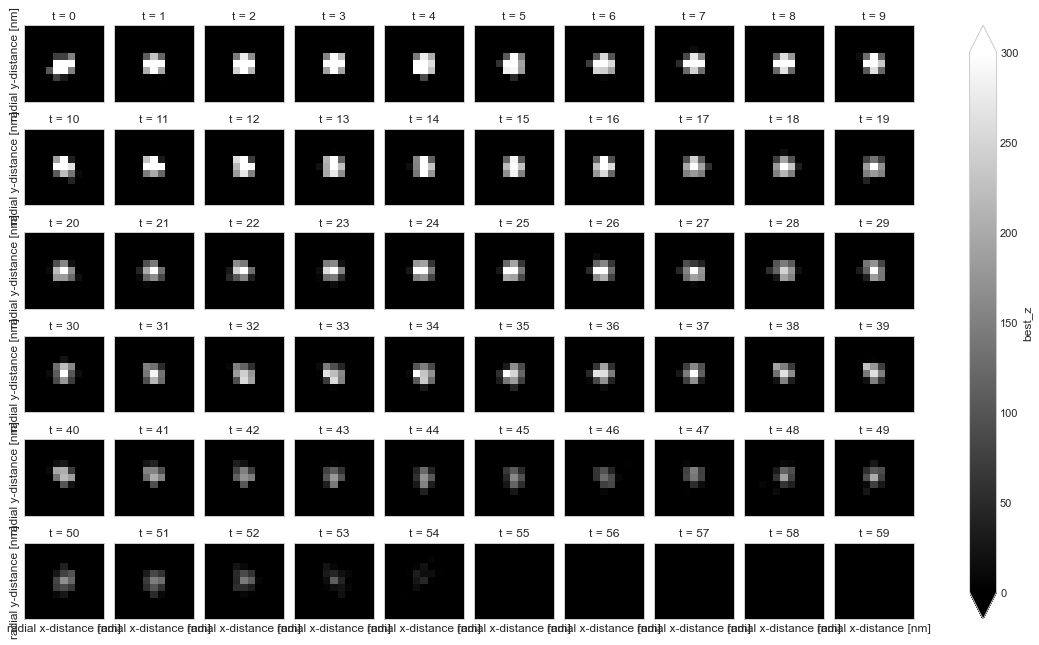

In [ ]:
my_ca.best_z.mean('n').sel(fov=0,ch=1).rolling(t=3,min_periods=1).mean().plot.imshow(col='t',col_wrap=10,robust=True,xticks=[],yticks=[],size=1.5,cmap='gray', vmin=0, vmax =300)

Let's compare our disk-donut 'signal' layer (acquired from 3D image) to trackpy's (acquired from max-projection):

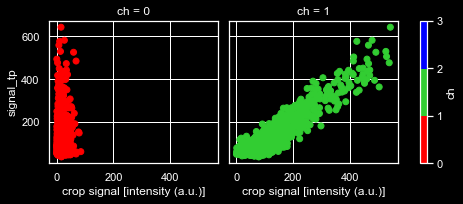

In [ ]:
# Let's compare our intensity numbers to those from trackpy:
my_ca.where(my_ca.signal>0).plot.scatter(x='signal',y='signal_tp',col='ch',hue='ch',colors=['red','limegreen','blue'],levels=[0,1,2,3])

Let's look at average signal vs time

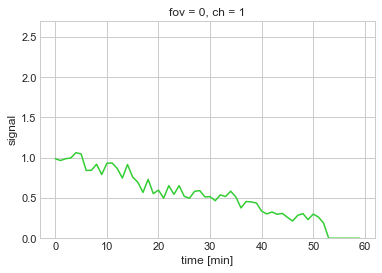

In [ ]:
# Let's look at average signal vs time
start_sig = my_ca.signal.mean('n').sel(t=slice(0,4)).mean('t')
end_sig = 0# my_ca.signal.mean('n').sel(t=slice(15,20)).mean('t')
norm_sig = (my_ca.signal.mean('n') - end_sig)/(start_sig - end_sig)
sns.set_palette(['limegreen','limegreen','blue'])
norm_sig.sel(fov=0,ch=1).plot.line(x='t',hue='ch',ylim=[0,2.7])

Now let's just use trackpy's values:

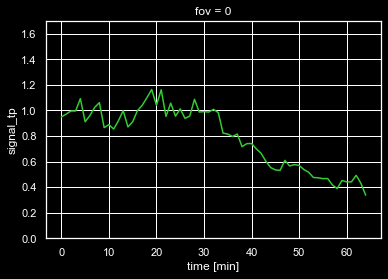

In [ ]:
# Let's look at average signal vs time
start_sig = my_ca.signal_tp.mean('n').sel(t=slice(0,4)).mean('t')
end_sig = 0# my_ca.signal_tp.mean('n').sel(t=slice(15,20)).mean('t')
norm_sig = (my_ca.signal_tp.mean('n') - end_sig)/(start_sig - end_sig)
sns.set_palette(['limegreen','limegreen','blue'])
norm_sig.sel(fov=0).plot.line(x='t',hue='ch',ylim=[0,1.7])

I guess trackpy and the disk donut method do a very good job at getting the intensities of spots. Although note that trackpy got the values from the max-intensity projection. Interesting.

## Visualize crop array montage with Napari
___

Now let's see a montage of the selected spots' best-z planes:

In [ ]:
# view the action of montage showing an n x n crop_array through time
viewer = napari.view_image(ca.montage(my_ca.sel(fov=0,ch=1).best_z,row='n',col='t'),contrast_limits=[60,1680])

## Optional: Create Track Array or view tracks again
___

In [ ]:
# If you already ran this and just want to view tracks again, load this:
my_output_dir = r'\\129.82.125.210\TSnas2\galindo\1_Imaging_Data\20220314_Cry2OligoDark_translation\60TP_1mINT_puro\Tracks'
my_filename = r'Tracks_Cell03.nc'
img_4D_filename = 'Cell03.tif'
dir = r'\\129.82.125.210\TSnas2\galindo\1_Imaging_Data\20220314_Cry2OligoDark_translation\60TP_1mINT_puro'
img_4D =  imread(os.path.join(dir,img_4D_filename))
f_all = pd.read_csv(os.path.join(my_output_dir,'Spots_Cell03.csv'))
my_ca=xr.open_dataset(os.path.join(my_output_dir,my_filename))
my_ca

<xarray.Dataset>
Dimensions:    (t: 60, z: 13, y: 11, x: 11, n: 5, ch: 3, fov: 1)
Coordinates:
  * t          (t) int32 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
  * z          (z) int32 0 500 1000 1500 2000 2500 ... 4000 4500 5000 5500 6000
  * y          (y) int32 -5 -4 -3 -2 -1 0 1 2 3 4 5
  * x          (x) int32 -5 -4 -3 -2 -1 0 1 2 3 4 5
  * n          (n) int16 0 1 2 3 4
  * ch         (ch) int32 0 1 2
  * fov        (fov) int32 0
Data variables:
    int        (fov, n, t, z, y, x, ch) int32 ...
    xc         (fov, n, t, ch) int32 ...
    yc         (fov, n, t, ch) int32 ...
    id         (fov, n, t) float64 ...
    signal_tp  (fov, n, t) float64 ...
    dx         int32 ...
    dy         int32 ...
    dz         int32 ...
    dt         int32 ...
    xy_pad     int32 ...
Attributes:
    name:     \\129.82.125.210\TSnas2\galindo\1_Imaging_Data\20220314_Cry2Oli...
    date:     video_date

In [ ]:
# # Note, if you actually wanted to track, you could use the following:
# # link tracks
max_distance_movement = 20
track_skip_frames = 3
min_trajectory_length = 10
t = tp.link(f_all, max_distance_movement, memory=track_skip_frames)
t1 = tp.filter_stubs(t, min_trajectory_length)
t1['particle'] = t1['particle']+1 # VERY IMPORTANT NOT TO HAVE TRACK IDs WITH VALUES = 0 WHEN MAKING CROP ARRAYS AS ZERO IS DEFAULT EMPTY VALUE
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique()) 
t1

KeyError: 'frame'

In [ ]:
# # only if you tracked:
spots = my_ca.copy()
spots.rename(columns={'x': 'xc','y': 'yc', 'frame': 'f','signal':'signal_tp','particle':'id'}, 
inplace=True, errors='raise')


spots['fov']=0
spots.rename(columns={'particle':'id'})
spots = spots[['fov','id','f','yc','xc','signal_tp']] # keeping signal out of curiousity... want to compare to disk-donut measurements  
spots

ValueError: cannot rename 'columns' because it is not a variable or dimension in this dataset

In [ ]:
my_ca2 = ca.create_crop_array(img_croparray,spots,xy_pad=7, dxy=130, dz=500, dt=1, units=['nm','min'])
my_ca2

Original video dimensions:  (1, 60, 13, 512, 512, 3)
Padded video dimensions:  (1, 60, 13, 528, 528, 3)
Max # of spots per frame:  16
Shape of numpy array to hold all crop intensity data:  (1, 16, 60, 13, 15, 15, 3)
Shape of xc and yc numpy arrays:  (1, 16, 60, 3)
Shape of extra my_layers numpy array:  (2, 1, 16, 60)


IndexError: index 60 is out of bounds for axis 3 with size 60

In [ ]:
#my_ca2 = my_ca
# Measure signals and plot average signal through time, creating 'best_z' layer and 'signal' layer
ca.measure_signal(my_ca, ref_ch=1, disk_r=4, roll_n=3)

In [ ]:
import xarray as xr
import pandas as pd
# Since ids correspond to tracks, we can organize tracks in rows  
my_ids = np.unique(my_ca.id) # Find all unique ids
my_ids = my_ids[1:] # remove the '0' ID used as filler in Crop Arrays
my_ids
# Get a list of xarrays for each unique id 
my_das = []
for i in np.arange(len(my_ids)):
    temp = my_ca.groupby('id')[my_ids[i]].reset_index('stacked_fov_n_t').reset_coords('n',drop=True).reset_coords('fov',drop=True).swap_dims({'stacked_fov_n_t':'t'})
    my_das.append(temp)
    del temp
# Concatenate the xarrays together to make a new xarray dataset in a track array format (each track on separate row). Here 'n' is replaced by 'tracks'
my_taz = xr.concat(my_das, dim=pd.Index(my_ids, name='track_id'), fill_value=0) # fill_value=0 so keep int instead of moving to floats with NaNs
my_taz = my_taz.transpose('track_id','fov','n','t','z','y','x','ch', missing_dims='ignore') # reorder for napari

In [ ]:
# view the action of montage showing an n x n crop_array through time
viewer2 = napari.view_image(ca.montage(my_taz.sel(ch=1).best_z,row='track_id',col='t'),contrast_limits=[60,800])

In [ ]:
viewer = napari.Viewer()

In [ ]:
pad = my_taz.xy_pad.values[0]
my_id = 3
my_xs = my_taz.isel(ch=1,track_id=my_id).xc.values
my_ys= my_taz.isel(ch=1,track_id=my_id).yc.values
my_ts= my_taz.isel(ch=1,track_id=my_id).t.values
my_chs = [1 for i in np.arange(len(my_ts))]
my_pts = np.transpose(np.array([my_ts,my_chs,my_ys-pad-.5,my_xs-pad-.5]))
viewer.add_points(my_pts,size = 12, face_color='transparent', edge_color = 'yellow', symbol='disc')


<Points layer 'my_pts [4]' at 0x18f261c86a0>

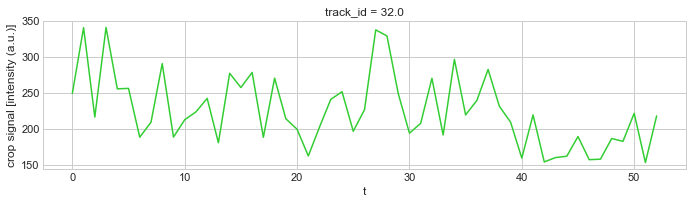

In [ ]:
my_taz.isel(track_id=[3]).sel(t=slice(0,58),ch=1).signal.plot.line(x='t',col='track_id',col_wrap=3,aspect=3)
plt.savefig(os.path.join(my_output_dir,'sampletracklineplot.svg'))

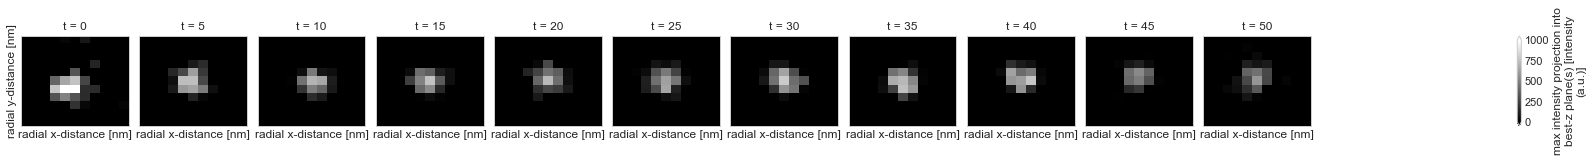

In [ ]:
plt.style.use('seaborn-whitegrid')
mytrack = my_taz.isel(track_id=3,ch=1).best_z.rolling(t=5,min_periods=1).mean().sel(t=slice(0,58,5)).plot.imshow(col='t',col_wrap=12,cmap='gray',robust=True,xticks=[],yticks=[],size=2,sharex=True,sharey=True,vmin=0,vmax=1000)
plt.savefig(os.path.join(my_output_dir,'sampletrackcrop.svg'))